In [375]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
# Load each dataset
books = pd.read_csv('books.csv')
checkouts = pd.read_csv('checkouts.csv')
customers = pd.read_csv('customers.csv')
libraries = pd.read_csv('libraries.csv')

In [376]:
# Define a function to display data previews
def preview_data(data):
    print("First few rows:")
    print(data.head())
    print("\nLast few rows:")
    print(data.tail())
    print("\nRandom sample of rows:")
    print(data.sample(5))
    print("\nDescriptive statistics:")
    print(data.describe(include='all'))

# Apply the function to each dataset
preview_data(books)
preview_data(checkouts)
preview_data(customers)
preview_data(libraries)

First few rows:
             id                                              title  \
0  hVFwAAAAQBAJ                              Ogilvy on Advertising   
1  bRY9AAAAYAAJ  Foreign Publications for Advertising American ...   
2  ZapAAAAAIAAJ                Advertising and the Public Interest   
3  A-HthMfF5moC                             Profitable Advertising   
4  4Z9JAAAAMAAJ  Report of the Federal Trade Commission on Dist...   

                                             authors publisher publishedDate  \
0                                   ['David Ogilvy']   Vintage    2013-09-11   
1  ['United States. Bureau of Foreign and Domesti...       NaN          1913   
2                ['John A. Howard', 'James Hulbert']       NaN          1973   
3                                                NaN       NaN          1894   
4        ['United States. Federal Trade Commission']       NaN          1944   

                    categories      price pages  
0           ['Social Science']  

In [377]:
# Check for missing values in each dataset
print("Missing Values in Checkouts Dataset:")
print(checkouts.isnull().sum())

print("\nMissing Values in Books Dataset:")
print(books.isnull().sum())

print("\nMissing Values in Customers Dataset:")
print(customers.isnull().sum())

print("\nMissing Values in Libraries Dataset:")
print(libraries.isnull().sum())

Missing Values in Checkouts Dataset:
id                0
patron_id         0
library_id        0
date_checkout    65
date_returned    58
dtype: int64

Missing Values in Books Dataset:
id                 0
title              0
authors           67
publisher        146
publishedDate      2
categories        39
price              2
pages              0
dtype: int64

Missing Values in Customers Dataset:
id                  0
name                0
street_address      0
city               94
state             102
zipcode             1
birth_date        107
gender            101
education         104
occupation        107
dtype: int64

Missing Values in Libraries Dataset:
id                0
name              0
street_address    0
city              4
region            2
postal_code       3
dtype: int64


In [378]:
# Function to calculate and print the percentage of missing values
def missing_data(data):
    percent_missing = data.isnull().mean() * 100
    missing_value_df = pd.DataFrame({'column_name': data.columns,
                                     'percent_missing': percent_missing})
    missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
    print(missing_value_df)

# Apply to each dataset
print("Missing Data in Books:")
missing_data(books)
print("Missing Data in Checkouts:")
missing_data(checkouts)
print("Missing Data in Customers:")
missing_data(customers)
print("Missing Data in Libraries:")
missing_data(libraries)

Missing Data in Books:
                 column_name  percent_missing
publisher          publisher        60.833333
authors              authors        27.916667
categories        categories        16.250000
publishedDate  publishedDate         0.833333
price                  price         0.833333
id                        id         0.000000
title                  title         0.000000
pages                  pages         0.000000
Missing Data in Checkouts:
                 column_name  percent_missing
date_checkout  date_checkout             3.25
date_returned  date_returned             2.90
id                        id             0.00
patron_id          patron_id             0.00
library_id        library_id             0.00
Missing Data in Customers:
                   column_name  percent_missing
birth_date          birth_date             5.35
occupation          occupation             5.35
education            education             5.20
state                    state           

In [379]:
# Check data types of each dataset
print(checkouts.dtypes)
print(books.dtypes)
print(customers.dtypes)
print(libraries.dtypes)

id               object
patron_id        object
library_id       object
date_checkout    object
date_returned    object
dtype: object
id               object
title            object
authors          object
publisher        object
publishedDate    object
categories       object
price            object
pages            object
dtype: object
id                object
name              object
street_address    object
city              object
state             object
zipcode           object
birth_date        object
gender            object
education         object
occupation        object
dtype: object
id                object
name              object
street_address    object
city              object
region            object
postal_code       object
dtype: object


After inspecting the data I will now start the cleaning in order for the datasets: checkouts, customers, libraries and books.

In [380]:
checkouts.head(10)

,id,patron_id,library_id,date_checkout,date_returned
0,-xFj0vTLbRIC,b071c9c68228a2b1d00e6f53677e16da,225-222@5xc-jtz-hkf,2019-01-28,2018-11-13
1,HUX-y4oXl04C,8d3f63e1deed89d7ba1bf6a4eb101373,223-222@5xc-jxr-tgk,2018-05-29,2018-06-12
2,TQpFnkku2poC,4ae202f8de762591734705e0079d76df,228-222@5xc-jtz-hwk,2018-11-23,2019-01-24
3,OQ6sDwAAQBAJ,f9372de3c8ea501601aa3fb59ec0f524,23v-222@5xc-jv7-v4v,2018-01-15,2018-04-25
4,7T9-BAAAQBAJ,2cf3cc3b9e9f6c608767da8d350f77c9,225-222@5xc-jtz-hkf,2018-12-31,1804-01-23
5,iGoXAQAAMAAJ,80f93362e97d9f6108ea781e57739214,22c-222@5xc-jwj-pvz,2018-04-07,1815-08-11
6,CW-7tHAaVR0C,dd9f34e9d65126a2b02003d8ac60aaa4,22c-222@5xc-jwj-pvz,2018-01-10,2018-02-04
7,Cr74DwAAQBAJ,69a2fbbf7aaad8ac0729e55d85858b0e,23v-222@5xc-jv7-v4v,2106-02-26,2018-12-10
8,t1e3BWziAc8C,3b85b2c7b424618f533329018e9a11d5,222-222@5xc-jv5-nt9,2018-06-23,2018-07-14
9,2mtCAAAAYAAJ,365ab35282c5d61b319ff9cc3628e624,228-222@5xc-jtz-hwk,2018-08-07,2018-08-25


In [381]:
# Inspect the date_checkout and date_returned columns
print(checkouts[['date_checkout', 'date_returned']].sample(10))

     date_checkout date_returned
331     2018-08-23    2018-09-07
1489    2018-03-21    2018-04-07
456     2018-07-17    2018-07-22
685     2018-11-18    2018-12-13
1545    2018-12-18    2103-11-13
1622    2018-02-24    2018-03-04
126     2018-01-05    2018-03-02
404     2018-05-03    2018-05-17
763     2018-11-02    2018-11-29
1134     20180108%    2018-01-23


In [382]:
# Drop rows where date of checkout or return is missing because these fields are crucial for analyzing late returns
checkouts.dropna(subset=['date_checkout', 'date_returned'], inplace=True)

In [383]:
# Further inspect the date_checkout and date_returned columns
print(checkouts[['date_checkout', 'date_returned']].sample(10))

# Check counts of data points in each column
checkout_data_points = checkouts['date_checkout'].count()
returned_data_points = checkouts['date_returned'].count()

print("Number of data points in 'date_checkout':", checkout_data_points)
print("Number of data points in 'date_returned':", returned_data_points)

     date_checkout date_returned
1425    2018-03-08    2018-03-18
341     2018-07-03    2018-12-03
483     2018-02-16    2018-02-21
455     1803-05-06    2018-10-12
1604    2018-08-21    2018-09-05
1046    2018-06-20    2018-07-05
675     2018-04-08    2018-05-01
1081    2018-02-21    2018-03-19
1026    2018-04-09    2106-02-27
950     2018-11-06    2018-12-03
Number of data points in 'date_checkout': 1877
Number of data points in 'date_returned': 1877


In [384]:
# Function to clean and standardize date entries
def clean_and_standardize_date(date):
    date = str(date).strip()
    
    # Replace unwanted characters and delimiters
    date = date.replace('|', '/').replace('%', '').replace(' ', '/').replace('-', '/')
    
    # Check if the date is in 'YYYYMMDD' format and correct it
    if date.isdigit() and len(date) == 8:
        return f"{date[:4]}/{date[4:6]}/{date[6:]}"
    return date

# Apply the cleaning function to both date columns
checkouts['date_checkout'] = checkouts['date_checkout'].apply(clean_and_standardize_date)
checkouts['date_returned'] = checkouts['date_returned'].apply(clean_and_standardize_date)

# Convert to datetime format to ensure consistency
checkouts['date_checkout'] = pd.to_datetime(checkouts['date_checkout'], errors='coerce', format='%Y/%m/%d')
checkouts['date_returned'] = pd.to_datetime(checkouts['date_returned'], errors='coerce', format='%Y/%m/%d')

# Display the cleaned DataFrame
print(checkouts[['date_checkout', 'date_returned']].sample(10))

     date_checkout date_returned
1468    1808-04-22    2018-03-26
1669    2018-07-09    2018-07-22
581     1815-07-15    2018-07-06
18      2018-02-28    2018-03-10
1603    2018-03-10    2018-03-26
1806    2018-10-13    2115-08-01
1143    2018-08-11    2018-08-20
1888    2018-02-18    2018-03-01
1723    2018-11-13    1809-03-26
394     2018-04-11    2018-04-17


In [385]:
# Define a reasonable date range
start_date = pd.to_datetime('2010-01-01')
end_date = pd.to_datetime('2025-12-31')

# Filter out dates outside the defined range
checkout_outliers = checkouts[
    (checkouts['date_checkout'] < start_date) | 
    (checkouts['date_checkout'] > end_date)
]

returned_outliers = checkouts[
    (checkouts['date_returned'] < start_date) | 
    (checkouts['date_returned'] > end_date)
]

# Identify the rows where date_checkout is after or same as date_returned
inconsistent_dates = checkouts[checkouts['date_checkout'] >= checkouts['date_returned']]


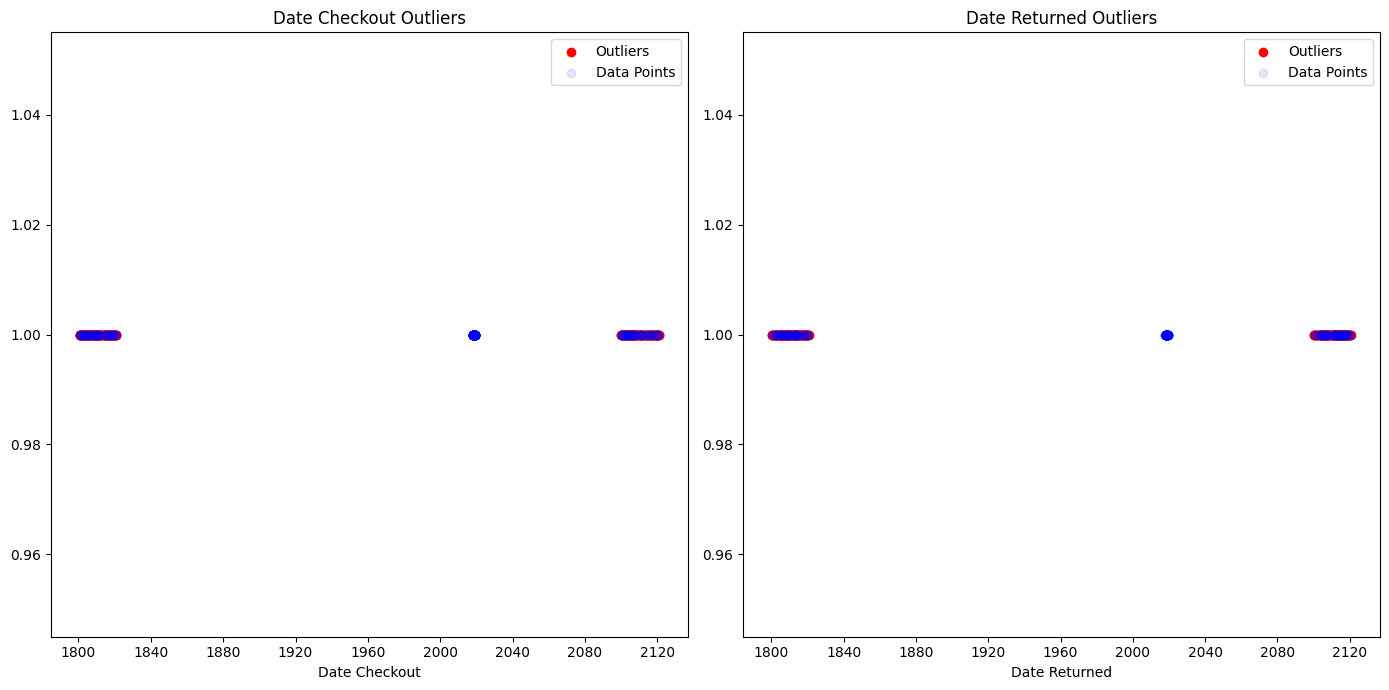

Number of checkout outliers: 174
Number of returned outliers: 177
Number of inconsistent date pairs: 241


In [386]:
# Plotting the outliers
plt.figure(figsize=(14, 7))

# Date Checkout Outliers
plt.subplot(1, 2, 1)
plt.scatter(checkout_outliers['date_checkout'], [1]*len(checkout_outliers), color='red', label='Outliers')
plt.scatter(checkouts['date_checkout'], [1]*len(checkouts), color='blue', alpha=0.1, label='Data Points')
plt.title('Date Checkout Outliers')
plt.xlabel('Date Checkout')
plt.legend()

# Date Returned Outliers
plt.subplot(1, 2, 2)
plt.scatter(returned_outliers['date_returned'], [1]*len(returned_outliers), color='red', label='Outliers')
plt.scatter(checkouts['date_returned'], [1]*len(checkouts), color='blue', alpha=0.1, label='Data Points')
plt.title('Date Returned Outliers')
plt.xlabel('Date Returned')
plt.legend()

plt.tight_layout()
plt.show()

# Print the counts of outliers and inconsistent dates
print(f"Number of checkout outliers: {len(checkout_outliers)}")
print(f"Number of returned outliers: {len(returned_outliers)}")
print(f"Number of inconsistent date pairs: {len(inconsistent_dates)}")

In [387]:
# Drop checkout outliers
checkouts = checkouts.drop(checkout_outliers.index)
# Print the number of rows removed
print(f"Number of checkout outliers removed: {checkout_outliers.shape[0]}")

Number of checkout outliers removed: 174


In [388]:
# Drop returned outliers
checkouts = checkouts.drop(returned_outliers.index)

# Print the number of rows removed
print(f"Number of returned outliers removed: {returned_outliers.shape[0]}")

Number of returned outliers removed: 177


In [389]:
# Drop inconsistent dates
checkouts = checkouts.drop(inconsistent_dates.index, errors='ignore')

# Print the number of rows removed
print(f"Number of inconsistent date pairs removed: {inconsistent_dates.shape[0]}")

Number of inconsistent date pairs removed: 241


In [390]:
# Inspect the date_checkout and date_returned columns
print(checkouts[['date_checkout', 'date_returned']].sample(30))

# Check counts of data points in each column
checkout_data_points = checkouts['date_checkout'].count()
returned_data_points = checkouts['date_returned'].count()

print("Number of data points in 'date_checkout':", checkout_data_points)
print("Number of data points in 'date_returned':", returned_data_points)

     date_checkout date_returned
785     2018-02-01    2018-02-26
1       2018-05-29    2018-06-12
1481    2018-04-12    2018-04-22
1642    2018-02-14    2018-03-07
403     2018-12-22    2019-01-11
1837    2018-11-21    2018-12-11
1977    2018-10-02    2018-10-16
349     2018-06-09    2018-07-05
383     2018-08-17    2018-09-12
1388    2018-07-08    2018-07-15
1952    2018-02-26    2018-03-25
715     2018-07-27    2018-08-03
1411    2018-06-18    2018-07-10
1709    2018-11-06    2018-11-25
799     2018-01-26    2018-02-20
909     2018-07-06    2018-08-04
123     2018-01-18    2018-02-14
1833    2018-12-03    2019-02-16
1015    2018-11-04    2018-11-12
1394    2018-08-29    2018-09-07
620     2018-06-09    2018-06-14
424     2018-02-05    2018-02-17
1672    2018-01-10    2018-01-22
71      2018-01-04    2018-01-11
1975    2018-05-01    2018-05-13
1645    2018-04-21    2018-05-12
299     2018-02-27    2018-03-21
1256    2018-11-18    2018-12-09
1772    2018-09-21    2018-10-13
3       20

In [391]:
# Check for missing values in each column
missing_values = customers.isnull().sum()
print(missing_values)

id                  0
name                0
street_address      0
city               94
state             102
zipcode             1
birth_date        107
gender            101
education         104
occupation        107
dtype: int64


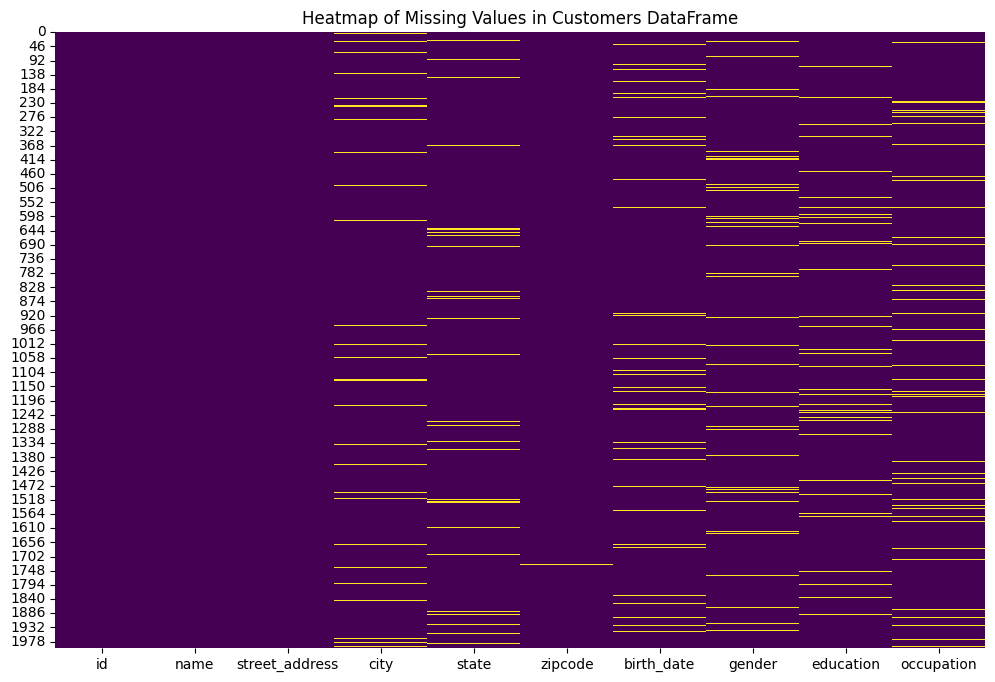

In [392]:
# Visualize missing values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(customers.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Customers DataFrame')
plt.show()

In [393]:
# Drop the 'name' column from the customers DataFrame
customers = customers.drop(columns=['name'])
# Drop street_address in customers
customers.drop(columns=['street_address'], inplace=True)

# Verify that the column has been removed
print(customers.head(10))

                                 id          city   state   zipcode  \
0  df83ec2d0d409395c0d8c2690cfa8b67     Portland   Oregon   97213.0   
1  6aec7ab2ea0d67161dac39e5dcabd857      Portland  Oregon   97215.0   
2  0c54340672f510fdb9d2f30595c1ab53      Portland  Oregon   97214.0   
3  f0d9ce833ddc1f73c1e0b55bdebf012e      Portland  Oregon   97217.0   
4  3720379163f6b46944db6c98c0485bfd           NaN  Oregon   97218.0   
5  8380f7f05a183e9b17f133d5e8a78707      Portland  Oregon   97218.0   
6  5b54076ff51088b8ce4f2c3692b79d66      Portland  Oregon  _97220.0   
7  0b585fb06695db3347b6e340f7f897bf  Happy Valley  Oregon   97086.0   
8  bfc7e857c666777a3ee53a9ed576ccdb      Portland  OREGON   97209.0   
9  7fd53f66a6d4cd12875487af4008bb08      Portland  Oregon   97233.0   

   birth_date   gender        education          occupation  
0  2009-09-10   female      High School                 NaN  
1  1956-12-15   female          College         Blue Collar  
2  1960-12-18     male          

In [394]:
print(customers.head(10))

                                 id          city   state   zipcode  \
0  df83ec2d0d409395c0d8c2690cfa8b67     Portland   Oregon   97213.0   
1  6aec7ab2ea0d67161dac39e5dcabd857      Portland  Oregon   97215.0   
2  0c54340672f510fdb9d2f30595c1ab53      Portland  Oregon   97214.0   
3  f0d9ce833ddc1f73c1e0b55bdebf012e      Portland  Oregon   97217.0   
4  3720379163f6b46944db6c98c0485bfd           NaN  Oregon   97218.0   
5  8380f7f05a183e9b17f133d5e8a78707      Portland  Oregon   97218.0   
6  5b54076ff51088b8ce4f2c3692b79d66      Portland  Oregon  _97220.0   
7  0b585fb06695db3347b6e340f7f897bf  Happy Valley  Oregon   97086.0   
8  bfc7e857c666777a3ee53a9ed576ccdb      Portland  OREGON   97209.0   
9  7fd53f66a6d4cd12875487af4008bb08      Portland  Oregon   97233.0   

   birth_date   gender        education          occupation  
0  2009-09-10   female      High School                 NaN  
1  1956-12-15   female          College         Blue Collar  
2  1960-12-18     male          

In [395]:
# Columns to convert to lowercase
columns_to_lowercase = ['city', 'state', 'gender', 'education', 'occupation']

# Convert the specified columns to lowercase
for column in columns_to_lowercase:
    customers[column] = customers[column].str.lower()

In [396]:
# Function to clean and standardize zip codes
def clean_zipcode(zipcode):
    # Remove any unwanted characters and spaces
    zipcode = re.sub(r'[^0-9]', '', str(zipcode))
    
    # Ensure the zipcode is 5 digits
    if len(zipcode) == 5:
        return zipcode
    elif len(zipcode) > 5:
        return zipcode[:5]
    else:
        return None

# Apply the cleaning function to the 'zipcode' column
customers['zipcode'] = customers['zipcode'].apply(clean_zipcode)

In [397]:
#inspect the dataframe and birth_date count
customers['birth_date'].count()

1893

In [398]:
# Function to clean and standardize date entries
def clean_and_standardize_date(date):
    date = str(date).strip()
    
    # Replace unwanted characters and delimiters
    date = date.replace('|', '/').replace('%', '').replace(' ', '/').replace('-', '/')
    
    # Check if the date is in 'YYYYMMDD' format and correct it
    if date.isdigit() and len(date) == 8:
        return f"{date[:4]}/{date[4:6]}/{date[6:]}"
    return date

# Apply the cleaning function to the 'birth_date' column
customers['birth_date'] = customers['birth_date'].apply(clean_and_standardize_date)

# Convert to datetime format to ensure consistency
customers['birth_date'] = pd.to_datetime(customers['birth_date'], errors='coerce', format='%Y/%m/%d')

# Display the cleaned DataFrame
print(customers[['birth_date']].sample(10))

     birth_date
1441 1990-06-25
183  1989-03-24
1484 1968-07-15
1555 1993-07-02
1241 1978-07-17
250  1814-12-29
977  1801-05-03
1671 1959-12-24
1478 2009-03-23
418  1971-02-03


In [399]:
# Define the date range
start_date = pd.Timestamp('1900/01/01')
end_date = pd.Timestamp('2020/12/31')

# Count out-of-range dates
out_of_range_dates = customers[(customers['birth_date'] < start_date) | (customers['birth_date'] > end_date) | (customers['birth_date'].isna())]
count_out_of_range = out_of_range_dates.shape[0]

# Print the count of out-of-range dates
print(f"Number of out-of-range birth dates: {count_out_of_range}")


Number of out-of-range birth dates: 293


In [400]:
# Function to clean birth_date
def clean_birth_date(birth_date):
    # Ensure the birth_date is a string
    birth_date = str(birth_date)
    
    # Remove time components
    birth_date = re.sub(r' 00:00:00$', '', birth_date)
    
    # Standardize the date format to 'YYYY-MM-DD'
    try:
        birth_date = pd.to_datetime(birth_date, errors='coerce').strftime('%Y-%m-%d')
    except:
        return pd.NaT
    
    # Correct the year if it is out of the plausible range
    try:
        year = int(birth_date[:4])
        if year < 1900 or year > 2020:
            return pd.NaT
    except:
        return pd.NaT
    
    return birth_date

# Apply the cleaning function to birth_date
customers['birth_date'] = customers['birth_date'].apply(clean_birth_date)

# Convert birth_date to datetime object and coerce errors to NaT
customers['birth_date'] = pd.to_datetime(customers['birth_date'], errors='coerce')

In [401]:
# Check for missing values in each column
missing_values = customers.isnull().sum()
print(missing_values)

id              0
city           94
state         102
zipcode         1
birth_date    293
gender        101
education     104
occupation    107
dtype: int64


In [402]:
# Fill missing values in 'occupation', 'education', and 'gender' with 'unknown'
customers['occupation'].fillna('unknown', inplace=True)
customers['education'].fillna('unknown', inplace=True)
customers['gender'].fillna('unknown', inplace=True)
customers['zipcode'].fillna('unknown', inplace=True)
customers['birth_date'].fillna('unknown', inplace=True)
customers['city'].fillna('unknown', inplace=True)
customers['state'].fillna('unknown', inplace=True)

# Check the result
print(customers[['occupation', 'education', 'gender', 'zipcode', 'birth_date', 'city', 'state',  ]].isnull().sum())

occupation    0
education     0
gender        0
zipcode       0
birth_date    0
city          0
state         0
dtype: int64


In [403]:
print(libraries.sample(10))

                     id                                           name  \
9   zzw-222@5xc-knn-c5z               Multnomah County Library Holgate   
14  zzw-222@5xc-jv4-789               Multnomah  County Library Albina   
8   226-222@5xc-jxj-7yv               Multnomah County Library Belmont   
0   226-222@5xc-kc4-fpv      Multnomah   County   Library Capitol Hill   
7   zzw-223@5xc-jv7-ct9        Friends OF the multnomah COUNTY Library   
12  225-222@5xc-jtz-hkf                       MULTNOMAH County Library   
15  222-222@5xc-jxp-rp9   Multnomah  County  Library Hollywood Library   
17  224-222@5xc-jw2-t9z       Multnomah COUNTY library Gregory Heights   
16  22c-222@5xc-jwj-pvz                MULTNOMAH County Library KENTON   
3   227-222@5xc-jww-btv          Multnomah   County Library Hillsdale    

                 street_address       city region postal_code  
9         7905  SE Holgate Blvd   Portland     OR         NaN  
14             3605 NE 15th Ave   Portland     OR      97

In [404]:
# Define a function to clean and standardize library names
def clean_library_name(name):
    # Strip leading and trailing whitespace
    name = name.strip()
    
    # Replace multiple spaces with a single space
    name = ' '.join(name.split())
    
    # Standardize the name format
    name = name.lower().title()  # Converts to title case
    
    # Special handling for consistent library naming
    if 'Multnomah County Library' not in name:
        name = 'Multnomah County Library ' + name.replace('Library ', '')
    
    return name

# Apply the cleaning function to the name column
libraries['name'] = libraries['name'].apply(clean_library_name)

# Check the result
print(libraries['name'].unique())

['Multnomah County Library Capitol Hill'
 'Multnomah County Library Northwest' 'Multnomah County Library St Johns'
 'Multnomah County Library Hillsdale'
 'Multnomah County Library Sellwood Moreland'
 'Multnomah County Library Woodstock' 'Multnomah County Library Central'
 'Friends Of The Multnomah County Library'
 'Multnomah County Library Belmont' 'Multnomah County Library Holgate'
 'Multnomah County Library Midland' 'Multnomah County Library'
 'Multnomah County Library North Portland'
 'Multnomah County Library Albina'
 'Multnomah County Library Hollywood Library'
 'Multnomah County Library Kenton'
 'Multnomah County Library Gregory Heights']


In [405]:
# Function to clean city names
def clean_city(city):
    city = str(city).strip().lower().title()  # Strip spaces and convert to title case
    return city

# Function to clean region names
def clean_region(region):
    region = str(region).strip().upper()  # Strip spaces and convert to upper case
    return region

# Function to clean postal codes
def clean_postal_code(postal_code):
    postal_code = str(postal_code).strip()  # Strip spaces
    postal_code = re.sub(r'[^0-9]', '', postal_code)  # Remove non-numeric characters
    return postal_code

# Apply the cleaning functions to the respective columns
libraries['city'] = libraries['city'].apply(clean_city)
libraries['region'] = libraries['region'].apply(clean_region)
libraries['postal_code'] = libraries['postal_code'].apply(clean_postal_code)

# Display the cleaned dataset
print(libraries.head(20))

                     id                                        name  \
0   226-222@5xc-kc4-fpv       Multnomah County Library Capitol Hill   
1   23v-222@5xc-jv7-v4v          Multnomah County Library Northwest   
2   222-222@5xc-jvf-skf           Multnomah County Library St Johns   
3   227-222@5xc-jww-btv          Multnomah County Library Hillsdale   
4   22d-222@5xc-kcy-8sq  Multnomah County Library Sellwood Moreland   
5   223-222@5xc-jxr-tgk          Multnomah County Library Woodstock   
6   zzw-224@5xc-jwv-2rk            Multnomah County Library Central   
7   zzw-223@5xc-jv7-ct9     Friends Of The Multnomah County Library   
8   226-222@5xc-jxj-7yv            Multnomah County Library Belmont   
9   zzw-222@5xc-knn-c5z            Multnomah County Library Holgate   
10  222-222@5xc-kkw-bzf            Multnomah County Library Midland   
11  228-222@5xc-jtz-hwk                    Multnomah County Library   
12  225-222@5xc-jtz-hkf                    Multnomah County Library   
13  22

In [406]:
# Fill missing values in the city and region columns based on street address
libraries['city'] = libraries['city'].replace('Nan', 'Portland')
libraries['region'] = libraries['region'].replace('NAN', 'OR')
libraries['postal_code'] = libraries['postal_code'].replace('', np.nan).fillna(method='ffill')

In [407]:
libraries.head(20)

,id,name,street_address,city,region,postal_code
0,226-222@5xc-kc4-fpv,Multnomah County Library Capitol Hill,10723 SW capitol Hwy,Portland,OR,97219
1,23v-222@5xc-jv7-v4v,Multnomah County Library Northwest,2300 NW Thurman St,Portland,OR,97219
2,222-222@5xc-jvf-skf,Multnomah County Library St Johns,7510 N Charleston Ave,Portland,OR,97203
3,227-222@5xc-jww-btv,Multnomah County Library Hillsdale,1525 SW Sunset blvd,Portland,OR,97239
4,22d-222@5xc-kcy-8sq,Multnomah County Library Sellwood Moreland,7860 SE 13th AVE,Portland,OR,97202
5,223-222@5xc-jxr-tgk,Multnomah County Library Woodstock,6008 se 49TH AVE,Portland,OR,97206
6,zzw-224@5xc-jwv-2rk,Multnomah County Library Central,801 SW 10th Ave,Portland,OR,97205
7,zzw-223@5xc-jv7-ct9,Friends Of The Multnomah County Library,522 SW 5th Ave,Portland,OR,97204
8,226-222@5xc-jxj-7yv,Multnomah County Library Belmont,1038 SE CESAR E CHAVEZ blvd,Portland,OR,97214
9,zzw-222@5xc-knn-c5z,Multnomah County Library Holgate,7905 SE Holgate Blvd,Portland,OR,97214


In [408]:
books.head(20)

,id,title,authors,publisher,publishedDate,categories,price,pages
0,hVFwAAAAQBAJ,Ogilvy on Advertising,['David Ogilvy'],Vintage,2013-09-11,['Social Science'],72.99,320
1,bRY9AAAAYAAJ,Foreign Publications for Advertising American ...,['United States. Bureau of Foreign and Domesti...,NaN,1913,['Advertising'],469.99,654
2,ZapAAAAAIAAJ,Advertising and the Public Interest,"['John A. Howard', 'James Hulbert']",NaN,1973,['Advertising'],372.0,784
3,A-HthMfF5moC,Profitable Advertising,NaN,NaN,1894,['Advertising'],240.99USD,559
4,4Z9JAAAAMAAJ,Report of the Federal Trade Commission on Dist...,['United States. Federal Trade Commission'],NaN,1944,['Government publications'],539.0,757
5,K5SYITH0vRIC,Advertising of Alcoholic Beverages. H.R. 4627,['United States. Congress. House. Committee on...,NaN,1956,NaN,484.5,682
6,TH8SSrWcVQ4C,Advertising Your Small Business,NaN,NaN,1984,['Advertising'],400.99,635
7,ZjZOAAAAMAAJ,Library of Advertising,['Axel Petrus Johnson'],NaN,1911,['Advertising'],*35.99,428
8,uFy7zQEACAAJ,Advertising,['Roderick White'],NaN,1980,['Advertising'],438.5,569
9,mR9eAgAAQBAJ,Negative Political Advertising,"['Karen S. Johnson-Cartee', 'Gary Copeland']",Routledge,2013-12-16,['Business & Economics'],311.99,640


In [409]:
# Count the number of unique authors and publishers
author_counts = books['authors'].value_counts()
publisher_counts = books['publisher'].value_counts()
# Print the results
print("Author Counts:")
print(author_counts)
print("\nPublisher Counts:")
print(publisher_counts)

Author Counts:
['Khan']                                                                              2
['Philip Reeve']                                                                      2
['Lev Abramovich Zalmanzon', 'Boris Aleksandrovich Cherkasov']                        1
['Stanisław Lem']                                                                     1
['T.A. Pratt']                                                                        1
                                                                                     ..
['Narayana N. Pillai, C.R. Ramakrishnan', 'C.R. Ramakrishnan']                        1
['Rebecca Vickers']                                                                   1
['Siddhartha Mukherjee']                                                              1
['David Linn Edsall', 'John Howland', 'Alan Mason Chesney', 'John Harold Talbott']    1
['U.S. Congress. Senate. Select Committee on National Water Resources']               1
Name: authors, Le

In [410]:
# Check for missing values in each column
missing_values = books.isnull().sum()
print(missing_values)

id                 0
title              0
authors           67
publisher        146
publishedDate      2
categories        39
price              2
pages              0
dtype: int64


In [411]:
# Rename the 'publishedDate' column to 'published_date'
books.rename(columns={'publishedDate': 'published_date'}, inplace=True)
# Drop the authors column
books = books.drop('authors', axis=1)
# Fill the missing values with 'Unknown'
books['publisher'] = books['publisher'].fillna('Unknown')
books['categories'] = books['categories'].fillna('Unknown')
books['published_date'].fillna('Unknown', inplace=True)
books['price'].fillna('$0', inplace=True)

In [412]:
# Fill empty values with placeholders
books['published_date'].fillna('Unknown', inplace=True)
books['price'].fillna('$0', inplace=True)

# Function to extract the year from various date formats
def extract_year(date):
    date = str(date)
    if '-' in date or '/' in date:
        year = re.findall(r'\d{4}', date)
        return year[0] if year else 'Unknown'
    return date

# Apply the year extraction function to the 'published_date' column
books['published_date'] = books['published_date'].apply(extract_year)

# Function to clean and format the price
def clean_price(price):
    price = str(price)
    price = re.sub(r'[^\d.]', '', price)
    if '.' in price:
        price = price.split('.')[0]
    return f"${price}"

# Apply the price cleaning function to the 'price' column
books['price'] = books['price'].apply(clean_price)

# Function to clean the pages column
def clean_pages(pages):
    pages = str(pages)
    pages = re.sub(r'[^\d]', '', pages)
    return int(pages) if pages.isdigit() else pages

# Apply the pages cleaning function to the 'pages' column
books['pages'] = books['pages'].apply(clean_pages)

# Display the cleaned dataset
print(books.head())

             id                                              title publisher  \
0  hVFwAAAAQBAJ                              Ogilvy on Advertising   Vintage   
1  bRY9AAAAYAAJ  Foreign Publications for Advertising American ...   Unknown   
2  ZapAAAAAIAAJ                Advertising and the Public Interest   Unknown   
3  A-HthMfF5moC                             Profitable Advertising   Unknown   
4  4Z9JAAAAMAAJ  Report of the Federal Trade Commission on Dist...   Unknown   

  published_date                   categories price  pages  
0           2013           ['Social Science']   $72    320  
1           1913              ['Advertising']  $469    654  
2           1973              ['Advertising']  $372    784  
3           1894              ['Advertising']  $240    559  
4           1944  ['Government publications']  $539    757  


In [413]:
# Rename 'id' in customers to 'patron_id'
customers.rename(columns={'id': 'patron_id'}, inplace=True)

# Rename 'id' in libraries to 'library_id'
libraries.rename(columns={'id': 'library_id'}, inplace=True)

# Display the updated column names
print("Checkouts columns:", checkouts.columns)
print("Customers columns:", customers.columns)
print("Libraries columns:", libraries.columns)

Checkouts columns: Index(['id', 'patron_id', 'library_id', 'date_checkout', 'date_returned'], dtype='object')
Customers columns: Index(['patron_id', 'city', 'state', 'zipcode', 'birth_date', 'gender',
       'education', 'occupation'],
      dtype='object')
Libraries columns: Index(['library_id', 'name', 'street_address', 'city', 'region',
       'postal_code'],
      dtype='object')


In [414]:
# Function to normalize text data
def normalize_text(series):
    return series.str.lower().str.strip().replace(r'\s+', ' ', regex=True)

# Normalize the relevant columns
customers['gender'] = normalize_text(customers['gender'])
customers['education'] = normalize_text(customers['education'])
customers['occupation'] = normalize_text(customers['occupation'])

# Optionally, print the unique values to verify the cleaning
print("Unique Genders:", customers['gender'].unique())
print("Unique Education Levels:", customers['education'].unique())
print("Unique Occupations:", customers['occupation'].unique())

Unique Genders: ['female' 'male' 'unknown']
Unique Education Levels: ['high school' 'college' 'graduate degree' 'others' 'unknown']
Unique Occupations: ['unknown' 'blue collar' 'education & health' 'sales' 'tech' 'others'
 'business & finance' 'admin & support']


In [415]:
# Save the cleaned data
books.to_csv('path_to_cleaned_books_csv_file.csv', index=False)
checkouts.to_csv('path_to_cleaned_checkouts_csv_file.csv', index=False)
customers.to_csv('path_to_cleaned_customers_csv_file.csv', index=False)
libraries.to_csv('path_to_cleaned_libraries_csv_file.csv', index=False)